In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Standardization (Z-Score Scaling)

df = pd.DataFrame({'h':[150, 160, 170, 185, 190],
                   'w':[50, 58, 70, 80, 90]})
df


,h,w
0,150,50
1,160,58
2,170,70
3,185,80
4,190,90


In [11]:
mean = df.mean()
sd = df.std()
print(sd)
z = (df-mean)/sd
z.round(2)

h    16.733201
w    16.149303
dtype: float64


,h,w
0,-1.25,-1.21
1,-0.66,-0.72
2,-0.06,0.02
3,0.84,0.64
4,1.14,1.26


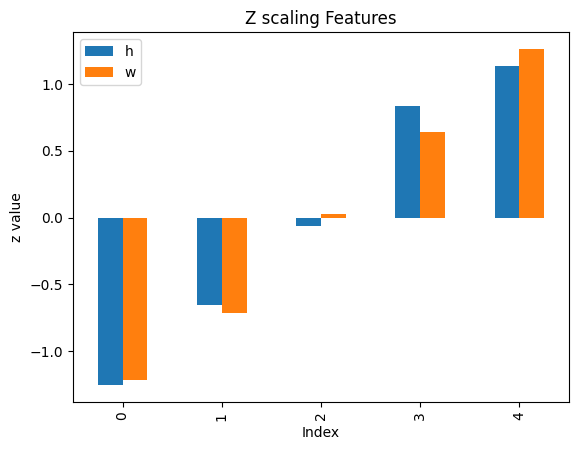

In [12]:
z.plot(kind='bar')
plt.title("Z scaling Features")
plt.xlabel("Index"); plt.ylabel('z value')
plt.show()

In [ ]:
# Min-Max Scaling  -- (1)dosen't work with outlier
#                     (2) Brings all value between [0-1]
mn = df.min()
mx = df.max()
rg = mx - mn
mn, mx, rg

(h    150
 w     50
 dtype: int64,
 h    190
 w     90
 dtype: int64,
 h    40
 w    40
 dtype: int64)

In [14]:
# Calculating the value (x - min) for every point
ss = df - mn
ss

,h,w
0,0,0
1,10,8
2,20,20
3,35,30
4,40,40


In [ ]:
# Applying the formula (x-min)/(min-max)
mm = ss / rg
mm.round(2)

,h,w
0,0.00,0.00
1,0.25,0.20
2,0.50,0.50
3,0.88,0.75
4,1.00,1.00


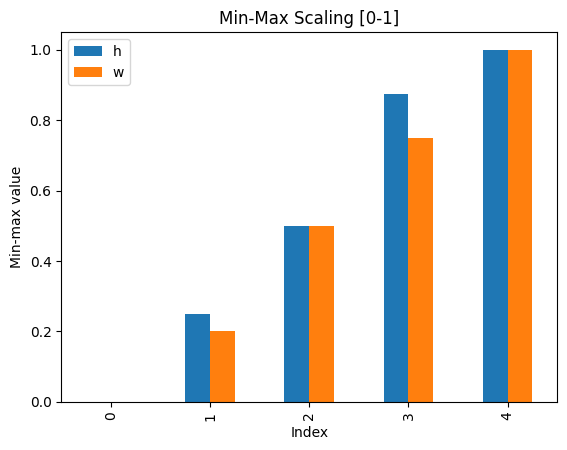

In [17]:
# Plot
mm.plot(kind = 'bar')
plt.title("Min-Max Scaling [0-1]")
plt.xlabel("Index")
plt.ylabel("Min-max value")
plt.show()

In [ ]:
# Robust Scaling (Outlier-Resistant) can handel outlier

data = pd.DataFrame({'h':[150, 160, 170, 180, 300],
                     'w':[50, 60, 70, 80, 200]})
data

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [20]:
# median, quartiles, IQR
md = data.median()
q1 = data.quantile(.25)
q3 = data.quantile(.75)
iqr = q3 - q1
md, q1, q3, iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [21]:
# calculating (x-median)

ct = data - md
ct

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [22]:
# Applying the formula (x-median)/IQR
rb = ct/iqr
rb.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


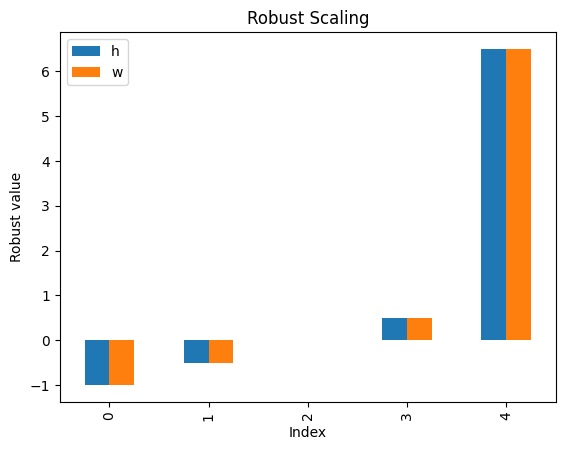

In [24]:
# visualize robust scaling
rb.plot(kind='bar')
plt.title("Robust Scaling")
plt.xlabel("Index"); plt.ylabel('Robust value')
plt.show()

In [25]:
# Comparing all the scalings

# standardization/z score
m = data.mean()
s = data.std()
z = (data - m) / s

# min max
mn = data.min()
mx = data.max()
mm = (data - mn) / (mx - mn)

# side-by-side all scaling values
all = pd.concat([data,
                 z.add_prefix('z_'),
                 mm.add_prefix('mm_'),
                 rb.add_prefix('rb_')], axis=1)
all.round(2)

,h,w,z_h,z_w,mm_h,mm_w,rb_h,rb_w
0,150,50,-0.68,-0.68,0.00,0.00,-1.0,-1.0
1,160,60,-0.52,-0.52,0.07,0.07,-0.5,-0.5
2,170,70,-0.36,-0.36,0.13,0.13,0.0,0.0
3,180,80,-0.20,-0.20,0.20,0.20,0.5,0.5
4,300,200,1.76,1.76,1.00,1.00,6.5,6.5


In [4]:
# One-Hot Encoding
table = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'color': ['red', 'blue', 'green', 'red'],
    'size': ['Small', "Medium", "Large", "Medium"],
    'price': [10, 12, 15, 11]
})

table

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,15
3,4,red,Medium,11


In [ ]:
d_color = pd.get_dummies(table['color'], prefix = 'C', dtype=int) # applying one-hot encoding
df_encoded = pd.concat([table, d_color], axis=1)  # concat the new column with orginal
print(df_encoded)

   id  color    size  price  C_blue  C_green  C_red
0   1    red   Small     10       0        0      1
1   2   blue  Medium     12       1        0      0
2   3  green   Large     15       0        1      0
3   4    red  Medium     11       0        0      1


In [6]:
# Ordinal Encoding

dto = pd.DataFrame({
    "id":[1,2,3,4],
    "color":["red","blue","green","red"],
    "size":["Small","Medium","Large","Medium"],
    "price":[10,12,20,14]
})
dto

,id,color,size,price
0,1,red,Small,10
1,2,blue,Medium,12
2,3,green,Large,20
3,4,red,Medium,14


In [9]:
order = {"Small": 1, "Medium": 2, "Large": 3} # declaring the ordinal order
dto["Size_encoded"] = dto["size"].map(order).astype(int) # associate with numerical values
dto


,id,color,size,price,Size_encoded
0,1,red,Small,10,1
1,2,blue,Medium,12,2
2,3,green,Large,20,3
3,4,red,Medium,14,2
